In [1]:
# Import Dependencies
import psycopg2
import sys
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Connection parameters
param_dic = {
    "host"      : "whr.csnc4l4qvlqd.us-east-2.rds.amazonaws.com",
    "database"  : "postgres",
    "user"      : "postgres",
    "password"  : "UCBwhr2021"
}

# Create connect function to connect to PostgresSQL server
def connect(param_dic):
    conn = None
    try:
        print("Connecting to the PostgreSQL database...")
        conn = psycopg2.connect(**param_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1)
    print ("Connection successful.")
    return conn
    

In [3]:
# Function to get the dataframe
def postgresql_to_dataframe(conn, select_query, column_names):
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
            print("Error: %s" % error)
            cursor.close()
    
    # Get list of tuples
    tuples = cursor.fetchall()
    cursor.close()
    
    # Create pandas dataframe
    df = pd.DataFrame(tuples, columns=column_names)
    return df

In [4]:
# Connect to database
conn = connect(param_dic)

column_names = ["country", "happinessrank", "happinessscore", "gdp", "family", "lifeexpectancy", "freedom", "generosity", "trust", "lat", "lng", "alcohol_liperyear"]
df = postgresql_to_dataframe(conn, "select * from whr_2019", column_names)
df.head()

Connecting to the PostgreSQL database...
Connection successful.


,country,happinessrank,happinessscore,gdp,family,lifeexpectancy,freedom,generosity,trust,lat,lng,alcohol_liperyear
0,Brazil,32,6.300,1.00400,1.43900,0.80200,0.39000,0.09900,0.08600,-14.235004,-51.925280,19.3
1,Uruguay,33,6.293,1.12400,1.46500,0.89100,0.52300,0.12700,0.15000,-32.522779,-55.765835,15.7
2,Singapore,34,6.262,1.57200,1.46300,1.14100,0.55600,0.27100,0.45300,1.352083,103.819836,2.9
3,El Salvador,35,6.253,0.79400,1.24200,0.78900,0.43000,0.09300,0.07400,13.794185,-88.896530,12.8
4,Italy,36,6.223,1.29400,1.48800,1.03900,0.23100,0.15800,0.03000,41.871940,12.567380,12.0


In [5]:
# Drop unnecessariy columns
df = df.drop(columns=["country", "happinessrank", "lat", "lng"], axis=1)
df = df.fillna(value=np.nan)
df.dtypes

happinessscore       object
gdp                  object
family               object
lifeexpectancy       object
freedom              object
generosity           object
trust                object
alcohol_liperyear    object
dtype: object

In [6]:
df = df[0:153].astype(float, errors = 'raise')
df.tail()

,happinessscore,gdp,family,lifeexpectancy,freedom,generosity,trust,alcohol_liperyear
148,4.812,0.673,0.799,0.508,0.372,0.105,0.093,15.1
149,4.418,0.094,1.125,0.357,0.269,0.212,0.053,7.1
150,4.944,0.569,0.808,0.232,0.352,0.154,0.090,21.7
151,4.360,0.710,1.181,0.555,0.525,0.566,0.172,17.6
152,5.274,0.983,1.294,0.838,0.345,0.185,0.034,NaN


In [7]:
df.dtypes

happinessscore       float64
gdp                  float64
family               float64
lifeexpectancy       float64
freedom              float64
generosity           float64
trust                float64
alcohol_liperyear    float64
dtype: object

## Predicting GDP - Happiness

In [8]:
# GDP
X = df.gdp
y = df.happinessscore
X_b = np.c_[np.ones((153, 1)), X]  # Adding the bias term which is equal to 1

# Dividing the data into train and test sets    
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

theta_optimize = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [9]:
# Predicting new data with the obtained feature weights
y_pred = X_test.dot(theta_optimize)
r2_score(y_test, y_pred)

0.48155178396040377

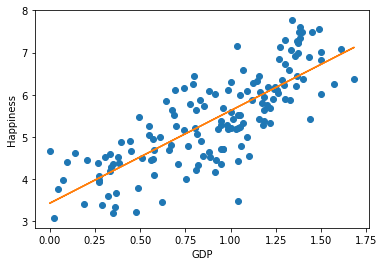

In [10]:
# Plot
x = np.array(df.gdp)
y = np.array(df.happinessscore)
plt.xlabel("GDP")
plt.ylabel("Happiness")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)



## Predicting Family - Happiness

In [11]:
# Family
X = df.family
y = df.happinessscore
X_b = np.c_[np.ones((153, 1)), X]  # Adding the bias term which is equal to 1

# Dividing the data into train and test sets    
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

theta_optimize = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [12]:
# Predicting new data with the obtained feature weights
y_pred = X_test.dot(theta_optimize)
r2_score(y_test, y_pred)

0.4857943575084075

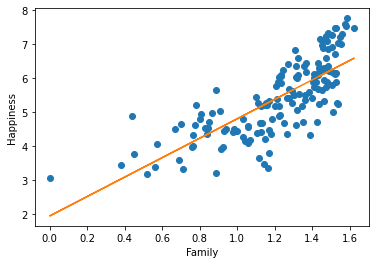

In [13]:
# Plot
x = np.array(df.family)
y = np.array(df.happinessscore)
plt.xlabel("Family")
plt.ylabel("Happiness")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

## Predicting Life Expectancy - Happiness

In [14]:
# Life Expectancy
X = df.lifeexpectancy
y = df.happinessscore
X_b = np.c_[np.ones((153, 1)), X]  # Adding the bias term which is equal to 1

# Dividing the data into train and test sets    
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

theta_optimize = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [15]:
# Predicting new data with the obtained feature weights
y_pred = X_test.dot(theta_optimize)
r2_score(y_test, y_pred)

0.46901442048510156

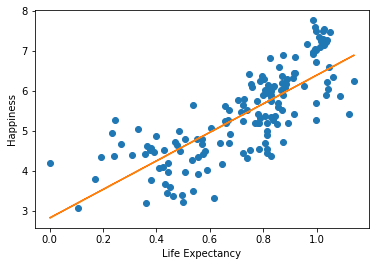

In [16]:
# Plot
x = np.array(df.lifeexpectancy)
y = np.array(df.happinessscore)
plt.xlabel("Life Expectancy")
plt.ylabel("Happiness")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

## Predicting Freedom - Happiness

In [17]:
# Freedom
X = df.freedom
y = df.happinessscore
X_b = np.c_[np.ones((153, 1)), X]  # Adding the bias term which is equal to 1

# Dividing the data into train and test sets    
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

theta_optimize = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [18]:
# Predicting new data with the obtained feature weights
y_pred = X_test.dot(theta_optimize)
r2_score(y_test, y_pred)

0.32290548305161604

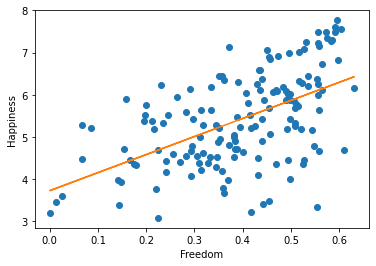

In [19]:
# Plot
x = np.array(df.freedom)
y = np.array(df.happinessscore)
plt.xlabel("Freedom")
plt.ylabel("Happiness")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

## Predicting Trust - Happiness

In [20]:
# Trust
X = df.trust
y = df.happinessscore
X_b = np.c_[np.ones((153, 1)), X]  # Adding the bias term which is equal to 1

# Dividing the data into train and test sets    
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

theta_optimize = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [21]:
# Predicting new data with the obtained feature weights
y_pred = X_test.dot(theta_optimize)
r2_score(y_test, y_pred)

0.09065899167790492

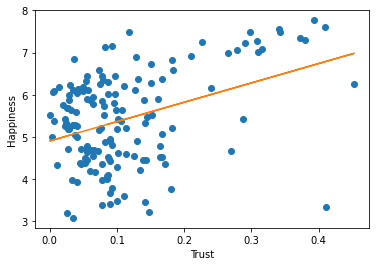

In [22]:
# Plot
x = np.array(df.trust)
y = np.array(df.happinessscore)
plt.xlabel("Trust")
plt.ylabel("Happiness")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

## Predicting Generosity - Happiness

In [23]:
# Generosity
X = df.generosity
y = df.happinessscore
X_b = np.c_[np.ones((153, 1)), X]  # Adding the bias term which is equal to 1

# Dividing the data into train and test sets    
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

theta_optimize = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [24]:
# Predicting new data with the obtained feature weights
y_pred = X_test.dot(theta_optimize)
r2_score(y_test, y_pred)

0.022577739431687394

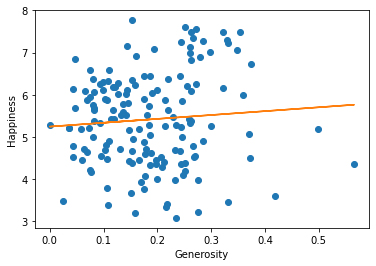

In [25]:
# Plot
x = np.array(df.generosity)
y = np.array(df.happinessscore)
plt.xlabel("Generosity")
plt.ylabel("Happiness")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

## Predicting Alcohol Consumption - Happiness

In [26]:
# Alcohol Consumption
X = df.alcohol_liperyear
y = df.happinessscore
X_b = np.c_[np.ones((153, 1)), X]  # Adding the bias term which is equal to 1

# Dividing the data into train and test sets    
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

theta_optimize = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [27]:
# Predicting new data with the obtained feature weights
y_pred = X_test.dot(theta_optimize)
r2_score(y_test, y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Plot
x = np.array(df.alcohol_liperyear)
y = np.array(df.happinessscore)
plt.xlabel("Alcohol Consumption")
plt.ylabel("Happiness")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

In [ ]:
# Close the connection
conn.close()